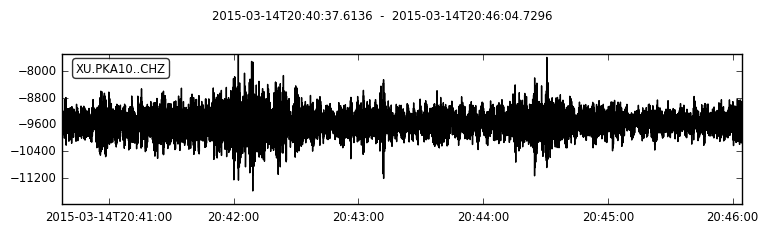

In [77]:
# Modified referring to gmpe-smtk Tools
# The script is from my lecturer, Mr. Sigit Pramono
# I added some line of code to loop the process and saves the results as a text file, and also added some comments

# memanggil modul. 
# ibarat toolkit, jika kita mau memotong kayu, kita hanya mengambil gergaji saja dari toolkit tsb
import os
from obspy import read #menu baca di obspy
from obspy import core #menu core di obspy
from obspy import signal #menu untuk mengolah sinyal di obspy
import matplotlib.pyplot as plt #utk ploting
from obspy.io.xseed import Parser 
import numpy as np #untuk matrix

id_stasiun = 'PKA10'
id_komponen = 'CHZ'
data_file = '/media/ayato/DATA2/seistek/PALU/2.6_20150314_204146/20150314_204146_NEZ.mseed'
#memberi inisial file
st=read(data_file) #membaca data

#matplotlib inline untuk memunculkan plot di browser, bukan di window baru
%matplotlib inline 
#st.plot() #tampilkan 3 channel

tr = st.copy().select(station=id_stasiun,channel=id_komponen)[0] #memilih stasiun dan komponennya
tr.plot() #menampilkan waveform
#print tr #menampilkan informasi data (OT, sampling rate, total samples)



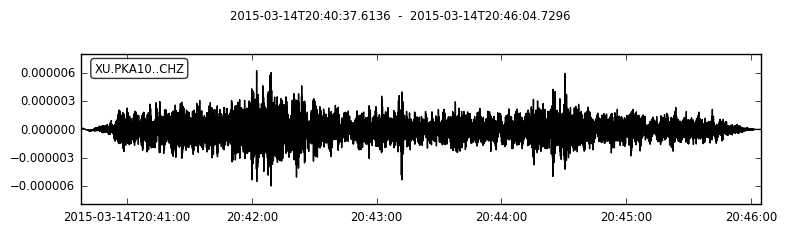

In [78]:

resp_file = '/media/ayato/DATA2/seistek/resp_file_antpalu/PK_dataless_seed'

ps = Parser(resp_file) #mendefinisikan instrumen respon yg sudah di-Parser
tr_cor = tr.copy().detrend('demean').taper(max_percentage=0.1,type='cosine') #mengkopi, menghapus trend demean, 

tr_cor.stats['channel'] = id_komponen #memilih komponen
tr_cor.stats['network'] = 'XU' #memilih jaringan seismograf
pre_filt = (.005, .006, 40.0, 45.0) 
tr_cor.simulate(seedresp={'filename': ps, 'units': 'VEL'}),pre_filt
tr_cor.filter('bandpass',freqmin=.1,freqmax=25) #filter bandpass dgn rentang 1-25 Hz
tr_cor.plot() #plot hasil menghilangkan response instrumennya


PGD=5.08936184264e-07 m
PGV=6.26685751569e-06 m/s
PGA=0.000484028453182 m/s2
PGA=4.93418605174e-05


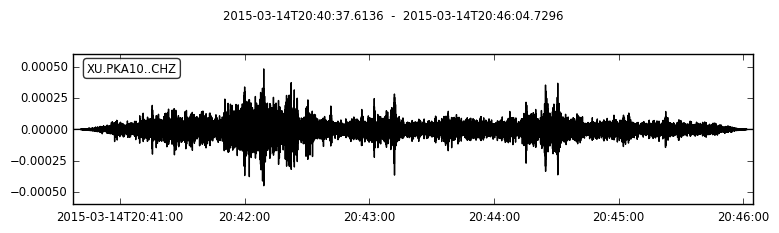

In [79]:
st1=tr_cor.copy().integrate() #mengintergralkan utk jadi sinyal displacement
st2=tr_cor.copy().differentiate(method='gradient') #menurunkan untuk menjadi sinyal kecepatan
peak0=np.amax(np.abs(st1)) #menentukan/mencari amplitudo maksimum dan nilainya diabsolutkan
peak1=np.amax(np.abs(tr_cor))
peak2=np.amax(np.abs(st2))
print 'PGD=' + str(peak0), 'm'
print 'PGV=' + str(peak1), 'm/s'
print 'PGA=' + str(peak2), 'm/s2'
print 'PGA=' + str(peak2*0.10194)
st2.plot()

In [80]:
st_cor = st.copy().detrend('demean').taper(max_percentage=0.1,type='cosine')
st_cor.simulate(seedresp={'filename': ps, 'units': 'VEL'}),pre_filt
st_cor.filter('bandpass',freqmin=.1,freqmax=25) #filter bandpass dgn rentang .1-25 Hz

acc=st_cor.copy().differentiate(method='gradient') #menurunkan untuk menjadi sinyal kecepatan


In [83]:
jml_trace = sum(1 for line in st)
print jml_trace

file = open("pga2.txt","w") 

for i in range(jml_trace):
    pga=np.amax(np.abs(acc[i]))
    file.write(str(pga*0.10194)+"\n")

file.close()

40


In [82]:
file = open("stasiun2.txt","w") 
file.write(str(st.__str__(extended=True)))
file.close()